**#Introducción a Phyton Maria Camila Cujilema**
#tipos de datos
#como crear variables 
#como usar funciones
#Control + Enter corre cada celda

In [4]:
#Phyton es como una calculadora
3+5*4

23

In [ ]:
#como agrego celdas /eliminar
#Esc+B (abajo)
#Esc+A (arriba)
#Esc+x (borrar)

Esta es una celda para escribir texto. Ejemplo video  (MARKDOWN)

In [5]:
#Asignar valores a una variable 
peso=60 #

In [6]:
peso_kg=60.3

Phyton distingue varios tipos de datos.Integer (Enteros), Float (decimales), String (texto)

In [7]:
paciente_id="001" #comillas para texto

In [8]:
paciente_id

'001'

In [9]:
peso_lb=2.2*peso_kg

In [10]:
print(peso_lb) #con el comando print es mas efectivo . no se modifica

132.66


In [11]:
#asignar dos variables al mismo tiempo
a,b=2,3
print(a)
print(b)

2
3


In [12]:
print(paciente_id, "peso en kilogramos:", peso_kg)
    

001 peso en kilogramos: 60.3


tambien pueden llamarse funciones dentro de funciones

In [13]:
print(type(60.3))
print(type(paciente_id))
print(paciente_id)

<class 'float'>
<class 'str'>
001


In [14]:
print("peso en libras:", 2.2*peso_kg)

peso en libras: 132.66


In [15]:
mi_nombre="camila"
print(mi_nombre)

camila


In [16]:
print(mi_nombre[1]) #extraer la segunda letra de mi nombre. Phyton cuenta desde cero 

a


In [30]:
#como imprimes los ultimos 4 carateres de la variable full_name
full_name="Maria Cujilema"
print(full_name[-4:])
print(full_name[10:])

lema
lema


#procesar datos de tablas /matrices
#que son librerias y para que se usan
#seleccionar valores especificos de una matriz
#leer archivos netcdf
#realizar operaciones matematicas en matrices /tablas

In [17]:
import numpy as np #numerical phyton (mas usada en oceanograficos). #np=numpy
import netCDF4 as nc #primero se instalo netCDF4 desde la terminal

In [18]:
spy=np.array([1,4,5.0,6])
spy

array([1., 4., 5., 6.])

In [19]:
type(spy) #la variable es un numpy array pero no dice que hay dentro de spy

numpy.ndarray

In [20]:
print(spy.dtype) #tipo d datos dentro de array spy 

float64


In [21]:
print(spy.shape) #tamaño de variable spy
print(np.shape(spy))
print(spy[3])
print(spy[-1])

(4,)
(4,)
6.0
6.0


In [22]:
print("primer valor en los datos", spy[0])

primer valor en los datos 1.0


In [23]:
print(spy[2:]) #empieza en el indice 2 hasta el final
print(spy[1:3]) #empieza en el indice 1 pero no incluye el 3
print(spy[:2]) #no tenemos que incluir el limite inferior ni superior 

[5. 6.]
[4. 5.]
[1. 4.]


In [24]:
print(np.mean(spy)) #promedio
print(spy.mean())

4.0
4.0


In [ ]:
#Leer un archivo netCDF (formato de archivos comprimidos ). explica elsignificado de cada variable

In [32]:
fileobj=nc.Dataset("ERA5_Coarse.nc")

In [33]:
print(fileobj)
print(fileobj.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: Thu Dec  1 13:02:52 2022: ncks -F -d time,1,,4 ERA5_Coarse.nc ERA5_test.nc
Wed Nov 30 09:40:40 2022: ncks -F -d time,1,,10 ERA5_Coarse.nc ERA5_test.nc
    NCO: netCDF Operators version 4.7.6 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): latitude(180), longitude(360), time(19)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), int16 sp(time, latitude, longitude), int16 sst(time, latitude, longitude), int16 t2m(time, latitude, longitude), float32 t2m_F(time, latitude, longitude), int32 time(time), int16 tp(time, latitude, longitude), int16 u10(time, latitude, longitude), int16 v10(time, latitude, longitude)
    groups: 
dict_keys(['latitude', 'longitude', 'sp', 'sst', 't2m', 't2m_F', 'time', 'tp', 'u10', 'v10'])


In [36]:
lon = fileobj['longitude']
lat = fileobj['latitude']
time = fileobj['time']

In [37]:
print(lon)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    _FillValue: nan
    units: degrees_east
    long_name: longitude
unlimited dimensions: 
current shape = (360,)
filling on


In [38]:
print(lat) # nos da una explicación sobre la variable

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    _FillValue: nan
    units: degrees_north
    long_name: latitude
unlimited dimensions: 
current shape = (180,)
filling on


In [39]:
sst = fileobj['sst'] 

In [40]:
print(sst) # cuantas dimensiones tiene esta variable

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, latitude, longitude)
    _FillValue: -32767
    units: K
    long_name: Sea surface temperature
    add_offset: 289.4649014722902
    scale_factor: 0.0006169772945977599
    missing_value: -32767
unlimited dimensions: 
current shape = (19, 180, 360)
filling on


In [41]:
sst = fileobj['sst'][:] # que son los dos puntitos

In [42]:
print(np.shape(sst))

(19, 180, 360)


In [43]:
print(sst.shape) # cuantas dimensiones tiene esta variable

(19, 180, 360)


In [44]:
print(sst.std())
print(np.std(sst))

11.655968324582686
11.655968324582686


In [45]:
print(sst.mean()) # Si quieres el promedio de todos los datos

286.6423175466685


In [46]:
sst_C = sst - 273.15

In [47]:
print(sst_C.mean())

13.492317546668442


In [48]:
maxval, minval, stdval = np.max(sst_C), np.min(sst_C), np.std(sst_C)

In [49]:
print('Max SST:', maxval)
print('Min SST:', minval)
print('Desviación Standard:', stdval)

Max SST: 33.895052504558805
Min SST: -3.7202022151828373
Desviación Standard: 11.655968324582684


In [50]:
print(np.mean(sst_C, axis=0))

[[-1.6900546635534965 -1.6900546635534965 -1.6900546635534965 ...
  -1.6900546635534965 -1.6900546635534965 -1.6900546635534965]
 [-1.6900546635534965 -1.6900546635534965 -1.6900546635534965 ...
  -1.6900546635534965 -1.6900546635534965 -1.6900546635534965]
 [-1.6900546635534965 -1.6900546635534965 -1.6900546635534965 ...
  -1.6900546635534965 -1.6900546635534965 -1.6900546635534965]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


In [51]:
# El promedio de la temperatura en cada lat y lon de todo el tiempo
print(np.mean(sst_C, axis=0).shape)  # axis =0 es sobre dimensión 0 (tiempo)

(180, 360)


In [52]:
# El promedio de la temperatura sobre todos los renglones (latitud)
print(np.mean(sst_C, axis=1).shape) # axis = 1 es sobre dimensión renglones (rows latitud)

(19, 360)


In [53]:
np.mean(sst_C, axis=0).mean(axis=1)

masked_array(data=[-1.6900546635534965, -1.690051416304578,
                   -1.690049341673324, -1.6900467258339171,
                   -1.6900423961686917, -1.6900365330803657,
                   -1.6898238382761759, -1.6845676800983087,
                   -1.640277240795779, -1.5453931650084753,
                   -1.4157694110281362, -1.2815392305940898,
                   -1.1455699870376228, -0.9709779779625464,
                   -0.7244421551146182, -0.5243559563364235,
                   -0.2784883964530478, 0.08101306152140239,
                   0.4182163486554386, 0.7990733099364833,
                   0.9200757401857499, 1.0486383749996335,
                   1.4911550840076393, 2.0799568414636247,
                   2.5652982541989173, 2.929811696775026,
                   3.644901650973757, 3.7680883879972153,
                   4.090082237661396, 4.426223420538322, 4.79820863004297,
                   5.293147943410754, 5.621680820505642,
                   5.94431952

In [58]:
import numpy as np # libreria que procesa matricez
import pandas as pd # librearia tambien procesa matricez
import netCDF4 as nc
# La liberia mas usada para graficar datos
import matplotlib.pyplot as plt # importamos el módulo pyplot 
from matplotlib.dates import date2num, num2date, datetime

In [56]:
fileobj = nc.Dataset('ERA5_Coarse.nc') # importando el archivo
sst = fileobj['sst'][:] # Leyendo las variables del archivo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin
lon = fileobj['longitude'][:]
lat = fileobj['latitude'][:]
time = fileobj['time']

In [57]:
print(sst.shape)

(19, 180, 360)


In [59]:
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (19,)
filling on, default _FillValue of -2147483647 used

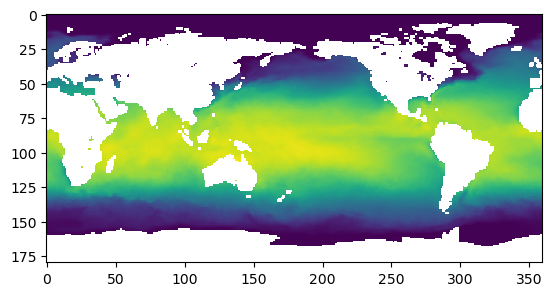

In [60]:
image = plt.imshow(sst[0])

comportamiento de la temperatura globa xlongitud 

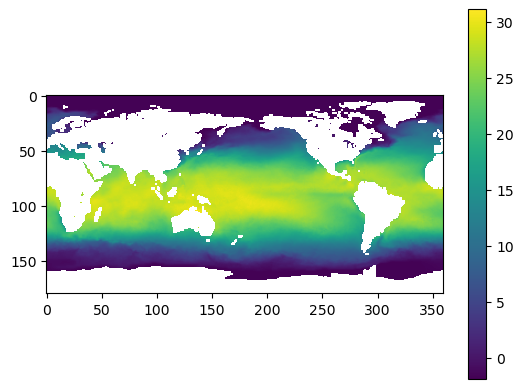

In [62]:
image = plt.imshow(sst[0]) # imshow es una manera rápida de ver matriz 2D
plt.colorbar() # vean la libreria cmocean
# plt.show()

In [ ]:
corriente Humboldt , en Australia es más cálido.

In [63]:
fileobj['sst']

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, latitude, longitude)
    _FillValue: -32767
    units: K
    long_name: Sea surface temperature
    add_offset: 289.4649014722902
    scale_factor: 0.0006169772945977599
    missing_value: -32767
unlimited dimensions: 
current shape = (19, 180, 360)
filling on

In [64]:
fileobj['time']

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (19,)
filling on, default _FillValue of -2147483647 used

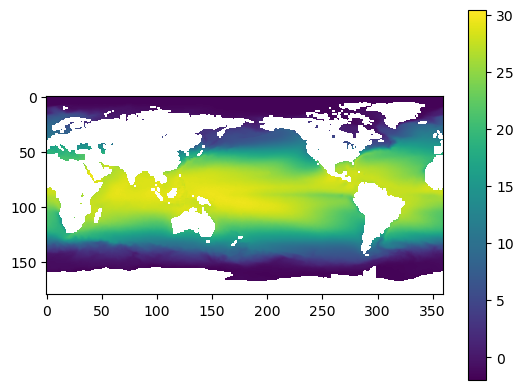

In [65]:
plt.imshow(sst.mean(0)) # la dimensión 0 es el tiempo
plt.colorbar()

In [66]:
time

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (19,)
filling on, default _FillValue of -2147483647 used

In [67]:
var = datetime.datetime.strptime('1900-01-01 00:00:00', '%Y-%d-%m %H:%M:%S')

In [68]:
ref = date2num(var)
time = fileobj['time'][:] / 24 + ref
# xarray
print(num2date(time[0]))
print(num2date(time[-1]))

1959-01-01 00:00:00+00:00
2019-01-01 00:00:00+00:00


In [69]:
print(num2date(time[0]))
print(num2date(time[1]))

1959-01-01 00:00:00+00:00
1962-05-01 00:00:00+00:00


In [70]:
sst_m_lon = np.mean(sst, axis=2).mean(axis=0)
sst_m_lon.shape

(180,)

In [71]:
print(lat.shape)

(180,)


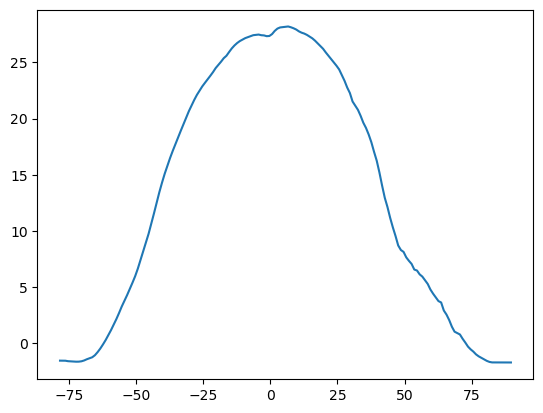

In [72]:
plt.plot(lat, sst_m_lon)

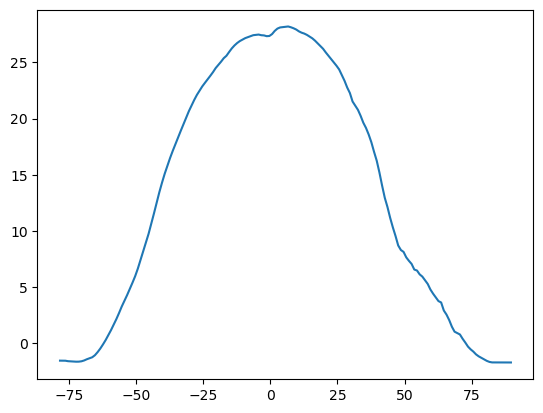

In [73]:
plt.plot(lat, sst_m_lon) # que podemos decir al respecto

Text(0, 0.5, 'Latitud')

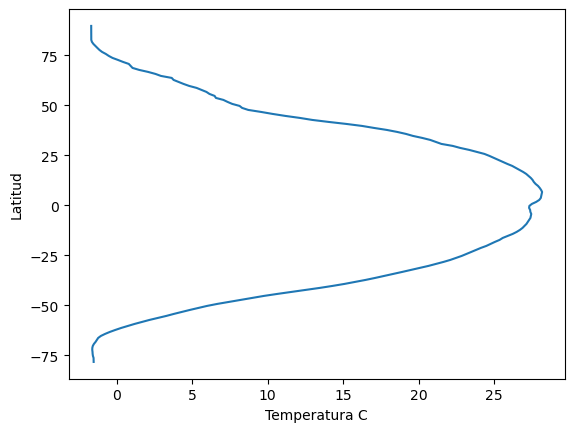

In [74]:
plt.plot(sst_m_lon, lat) # que podemos decir al respecto
plt.xlabel('Temperatura C')
plt.ylabel('Latitud')

In [75]:
sst_mean = sst.mean(axis=0) # promedio en dimensión 0 que es el tiempo
print(sst_mean.shape)
print(lat.shape)
print(lon.shape)

(180, 360)
(180,)
(360,)


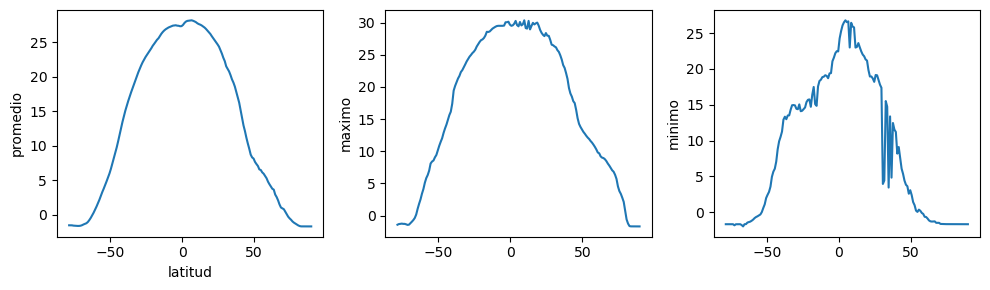

In [76]:
fig = plt.figure(figsize=(10.0, 3.0)) # fig es el nombre de mi figura

# 1 renglon y 3 columnas
axes1 = fig.add_subplot(1, 3, 1) # graficas dentro de la figure posicion 1
axes2 = fig.add_subplot(1, 3, 2) # posicion 2
axes3 = fig.add_subplot(1, 3, 3) # posicion 3

axes1.set_ylabel('promedio')
axes1.set_xlabel('latitud')
axes1.plot(lat, np.mean(sst_mean, axis=1))

axes2.set_ylabel('maximo')
axes2.plot(lat, np.max(sst_mean, axis=1))

axes3.set_ylabel('minimo')
axes3.plot(lat, np.min(sst_mean, axis=1))

fig.tight_layout()# grafica a la figura mas bonita

plt.savefig('sst.pdf') # se utilizan comillas y se puede utilizar diferentes formato
plt.show()

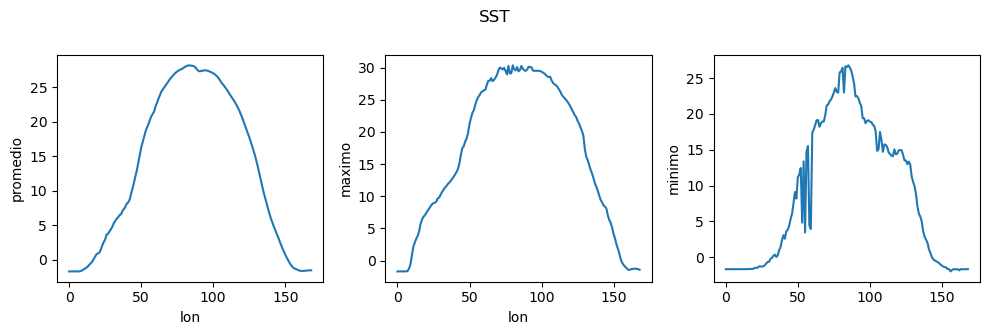

In [77]:
fig = plt.figure(figsize=(10.0, 3.0)) # labels y axis

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('promedio')
axes1.plot(np.mean(sst_mean, axis=1))
axes1.set_xlabel('lon')


axes2.set_ylabel('maximo')
axes2.plot(np.max(sst_mean, axis=1))
axes2.set_xlabel('lon')


axes3.set_ylabel('minimo')
axes3.plot(np.min(sst_mean, axis=1))
axes1.set_xlabel('lon')

fig.tight_layout()
plt.suptitle('SST', y=1.1)
plt.savefig('sst.png')
plt.show()

In [78]:
a = np.array([[1, 2], [3, 4]], float) # crear una matriz de dos dimensiones tipo float
b = np.array([[5, 6], [7,8]], float)

print('Matrix A')
print(a)
print('Matrix B')
print(b)

Matrix A
[[1. 2.]
 [3. 4.]]
Matrix B
[[5. 6.]
 [7. 8.]]


In [79]:
np.concatenate((a,b)) # unir las dos matrices

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [80]:
np.concatenate((a,b), axis=1) # unir las dos matrices

array([[1., 2., 5., 6.],
       [3., 4., 7., 8.]])

In [81]:
import xarray as xr # Libreria para procesar datos de gran tamaño